In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import random
import shutil
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

!pip install split-folders
import splitfolders

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir

print(f"TensorFlow version: {tf.__version__}")

--2023-12-26 15:48:24--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-12-26 15:48:24 (90.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]

TensorFlow version: 2.15.0


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
video_list = os.listdir('/content/drive/MyDrive/Halal Fishes Dataset/Halal Fish/Videos')
video_list

['IMG_1777.MOV',
 'IMG_1778.MOV',
 'IMG_1779.MOV',
 'IMG_1800.MOV',
 'IMG_1878.MOV',
 'IMG_1916.MOV']

In [ ]:
i = 0
currentframe = 0
while(video_list[i]):
  video = cv2.VideoCapture('/content/drive/MyDrive/Halal Fishes Dataset/Halal Fish/Videos/' + video_list[i])

  while(True):
    ret, frame = video.read()

    if ret:
      name = '/content/drive/MyDrive/Halal Fishes Extracted Frames/' + str(video_list[i]) + '_' + str(currentframe) + '.jpg'
      print('Creating...' + name)
      cv2.imwrite(name, frame)
      currentframe += 1
    else:
      break

  video.release()
  cv2.destroyAllWindows()
  i += 1

Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_0.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_1.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_2.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_3.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_4.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_5.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_6.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_7.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_8.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_9.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_10.jpg
Creating.../content/drive/MyDrive/Halal Fishes Extracted Frames/IMG_1777.MOV_11.jpg
Cr

IndexError: ignored

In [ ]:
os.listdir('/content/drive/MyDrive/Halal Fish Dataset Full')

['Ringi Cat Fish',
 'Tacan Fish',
 'Zandia or Dhandia Fish',
 'Heera Fish',
 'Jalabi Paplet Fish',
 'Black Water Rahu',
 'Parrot Fish',
 'Big Raho Fish',
 'Paplet Fish',
 'Moi Fish',
 'Red Snapper Fish',
 'Safi Fish',
 'Silver Carp Fish',
 'Rahu Fish',
 'Dilwar Fish',
 'Dhari Fish',
 'Sarum Fish',
 'Naiser Fish',
 'Cat Fish']

In [ ]:
os.listdir('/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train')

['Tacan Fish',
 'Zandia or Dhandia Fish',
 'Sarum fish',
 'Safi Fish',
 'remaining',
 'Silver carp Fish',
 'Ringi  like a cat fish',
 'Red snapper Fish',
 'Rahu Fish',
 'Heera Fish',
 'Paplet Fish',
 'Dhari Fish',
 'Naiser Fish',
 'Dilwar fish',
 'Cat fish',
 'Jalabi Paplat Fish',
 'Black Water Rahu',
 'Moi Fish',
 'Parrot Fish',
 'Big raho Fish']

In [ ]:
d = 0
for file in os.listdir('/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/test/Naiser Fish/'):
  d+=1
print(d)

3


In [ ]:
c = 0
for file in os.listdir('/content/drive/MyDrive/Halal Fish Dataset Full/Naiser/'):
  c+=1
print(c)

134


In [ ]:
for file in os.listdir('/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train/Naiser Fish/'):
  f = '/content/drive/MyDrive/Halal Fishes Dataset/JPG Halal Fish Splitted dataset/train/Naiser Fish/' + file
  !cp "$f" '/content/drive/MyDrive/Halal Fish Dataset Full/Naiser/'

In [4]:
path = '/content/drive/MyDrive/Halal Fish Dataset Full'
print(os.listdir(path))

['Ringi Cat Fish', 'Tacan Fish', 'Zandia or Dhandia Fish', 'Heera Fish', 'Jalabi Paplet Fish', 'Black Water Rahu', 'Parrot Fish', 'Big Raho Fish', 'Paplet Fish', 'Moi Fish', 'Red Snapper Fish', 'Safi Fish', 'Silver Carp Fish', 'Rahu Fish', 'Dilwar Fish', 'Dhari Fish', 'Sarum Fish', 'Naiser Fish', 'Cat Fish', 'SPLITTED_DATASET']


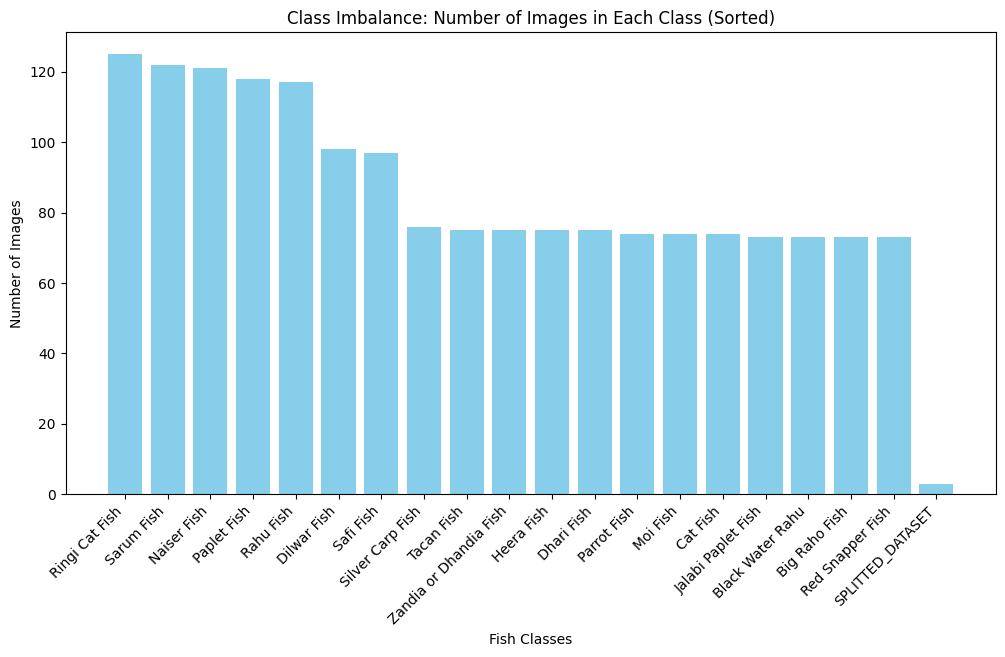

In [5]:
# Get the list of class folders
class_folders = os.listdir(path)

# Dictionary to store the count of images in each class
class_image_counts = {}

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(path, class_folder)

    # Count the number of images in the class folder
    num_images = len(os.listdir(class_path))

    # Store the count in the dictionary
    class_image_counts[class_folder] = num_images

# Sort the dictionary items by value in descending order
sorted_class_image_counts = dict(sorted(class_image_counts.items(), key=lambda item: item[1], reverse=True))

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(sorted_class_image_counts.keys(), sorted_class_image_counts.values(), color='skyblue')
plt.xlabel('Fish Classes')
plt.ylabel('Number of Images')
plt.title('Class Imbalance: Number of Images in Each Class (Sorted)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
sorted_class_image_counts

{'Ringi Cat Fish': 125,
 'Sarum Fish': 122,
 'Naiser Fish': 121,
 'Paplet Fish': 118,
 'Rahu Fish': 117,
 'Dilwar Fish': 98,
 'Safi Fish': 97,
 'Silver Carp Fish': 76,
 'Tacan Fish': 75,
 'Zandia or Dhandia Fish': 75,
 'Heera Fish': 75,
 'Dhari Fish': 75,
 'Parrot Fish': 74,
 'Moi Fish': 74,
 'Cat Fish': 74,
 'Jalabi Paplet Fish': 73,
 'Black Water Rahu': 73,
 'Big Raho Fish': 73,
 'Red Snapper Fish': 73}

In [ ]:
total_images = sum(class_image_counts.values())
total_classes = len(class_image_counts)
average_images_per_class = total_images / total_classes

print(f"Total Images: {total_images}")
print(f"Total Classes: {total_classes}")
print(f"Average Images per Class: {average_images_per_class:.2f}")

minority_class_names = []
# Print classes with fewer images than the average
print("Classes with fewer images than the average:")
for class_name, image_count in class_image_counts.items():
    if image_count < average_images_per_class:
        print(f"{class_name}: {image_count} images")
        minority_class_names.append(class_name)

Total Images: 1688
Total Classes: 19
Average Images per Class: 88.84
Classes with fewer images than the average:
Tacan Fish: 75 images
Zandia or Dhandia Fish: 75 images
Heera Fish: 75 images
Jalabi Paplet Fish: 73 images
Black Water Rahu: 73 images
Parrot Fish: 74 images
Big Raho Fish: 73 images
Moi Fish: 74 images
Red Snapper Fish: 73 images
Silver Carp Fish: 76 images
Dhari Fish: 75 images
Cat Fish: 74 images


In [ ]:
majority_class_names = []
for class_name, image_count in class_image_counts.items():
    if image_count > 100:
        print(f"{class_name}: {image_count} images")
        majority_class_names.append(class_name)

Ringi Cat Fish: 125 images
Paplet Fish: 118 images
Rahu Fish: 117 images
Sarum Fish: 122 images
Naiser Fish: 121 images


In [ ]:
minority_class_names

['Tacan Fish',
 'Zandia or Dhandia Fish',
 'Heera Fish',
 'Jalabi Paplet Fish',
 'Black Water Rahu',
 'Parrot Fish',
 'Big Raho Fish',
 'Moi Fish',
 'Red Snapper Fish',
 'Silver Carp Fish',
 'Dhari Fish',
 'Cat Fish']

In [ ]:
majority_class_names

['Ringi Cat Fish', 'Paplet Fish', 'Rahu Fish', 'Sarum Fish', 'Naiser Fish']

In [ ]:
#code to copy augmented minority classes back to full dataset
for mc in minority_class_names:
  d_directory = path + '/' + mc
  s_directory = '/content/drive/MyDrive/Halal Fish Dataset Minority Classes/AUGMENTED/' + mc
  for augmented_file in os.listdir(s_directory):
    augmented_file_path = os.path.join(s_directory, augmented_file)
    shutil.copy(augmented_file_path, d_directory)

In [ ]:
image_directory = '/content/drive/MyDrive/Halal Fish Dataset Minority Classes/'

for class_dir in os.listdir(image_directory):
  cd = os.path.join(image_directory, class_dir)
  for filename in os.listdir(cd):
      # Check if the file has a ".JPG" extension
      if filename.lower().endswith('.jpg'):
          # Construct the full paths
          old_path = os.path.join(cd, filename)
          new_filename = filename.lower()  # Convert to lowercase
          new_path = os.path.join(cd, new_filename)

          # Rename the file to have a ".jpg" extension
          os.rename(old_path, new_path)

In [ ]:
# Get the list of class folders
class_folders = os.listdir('/content/drive/MyDrive/Halal Fish Dataset Minority Classes/AUGMENTED')

# Dictionary to store the count of images in each class
minority_class_image_counts = {}

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join('/content/drive/MyDrive/Halal Fish Dataset Minority Classes/AUGMENTED', class_folder)

    # Count the number of images in the class folder
    num_images = len(os.listdir(class_path))

    # Store the count in the dictionary
    minority_class_image_counts[class_folder] = num_images

sorted_class_image_counts = dict(sorted(minority_class_image_counts.items(), key=lambda item: item[1], reverse=True))

total_images = sum(minority_class_image_counts.values())
total_classes = len(minority_class_image_counts)

print(f"Total Images: {total_images}")
print(f"Total Classes: {total_classes}")

Total Images: 557
Total Classes: 10


In [ ]:
sorted_class_image_counts

{'Zandia or Dhandia Fish': 72,
 'Tacan Fish': 68,
 'Heera Fish': 68,
 'Parrot Fish': 65,
 'Black Water Rahu': 64,
 'Jalabi Paplet Fish': 60,
 'Big Raho Fish': 60,
 'Cat Fish': 60,
 'Dhari Fish': 28,
 'Moi Fish': 12}

In [ ]:
sorted_class_image_counts['Moi Fish']

62

In [ ]:
for mc, ic in sorted_class_image_counts.items():
  print(f"{mc}: {ic} images")

Moi Fish: 62 images
Dhari Fish: 47 images
Cat Fish: 14 images
Jalabi Paplet Fish: 13 images
Big Raho Fish: 13 images
AUGMENTED: 10 images
Black Water Rahu: 9 images
Parrot Fish: 9 images
Tacan Fish: 7 images
Heera Fish: 7 images
Zandia or Dhandia Fish: 3 images


In [ ]:
# Set up data augmentation
augmentation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Specify the parent directory containing folders with images
parent_directory = '/content/drive/MyDrive/Halal Fish Dataset Minority Classes/'
save_directory = '/content/drive/MyDrive/Halal Fish Dataset Minority Classes/AUGMENTED'

if not os.path.exists(save_directory):
  os.mkdir(save_directory)
for mc in minority_class_names:
  dir = os.path.join(save_directory, mc)
  if not os.path.exists(dir):
    os.mkdir(dir)

a = 0
# Loop through each class folder
for class_folder, image_count in sorted_class_image_counts.items():
    class_directory = os.path.join(parent_directory, class_folder)
    save_path = os.path.join(save_directory, class_folder)

    # Ensure the directory exists
    if os.path.exists(class_directory) and (class_folder in minority_class_names):
        print(f"Augmenting images in {class_folder}...")

        # Loop through each image in the class folder
        while (len(os.listdir(class_directory)) + len(os.listdir(save_path)) < 72):
          for filename in os.listdir(class_directory):
              if filename.endswith(('.jpg', '.jpeg', '.png')):
                  # Read the image
                  image_path = os.path.join(class_directory, filename)
                  img = cv2.imread(image_path)
                  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                  # Expand dimensions to match batch_size for augmentation
                  img = np.expand_dims(img, axis=0)

                  # Augment the image
                  augmented_images = augmentation_datagen.flow(img, batch_size=4)

                  # Retrieve augmented image
                  augmented_img = next(augmented_images)[0]

                  # Loop through augmented images and save them
                  for i in range(4):
                      augmented_img = next(augmented_images)[0]
                      augmented_filename = f"augmented_{a}_{filename}"
                      augmented_image_path = os.path.join(save_path, augmented_filename)
                      cv2.imwrite(augmented_image_path, cv2.cvtColor((augmented_img * 255).astype(np.uint8), cv2.COLOR_RGB2BGR))
                      a+=1
                  if len(os.listdir(class_directory)) + len(os.listdir(save_path)) >= 72:
                    break

Augmenting images in Moi Fish...
Augmenting images in Dhari Fish...
Augmenting images in Cat Fish...
Augmenting images in Jalabi Paplet Fish...
Augmenting images in Big Raho Fish...
Augmenting images in Black Water Rahu...
Augmenting images in Parrot Fish...
Augmenting images in Tacan Fish...
Augmenting images in Heera Fish...
Augmenting images in Zandia or Dhandia Fish...


<ipython-input-27-1b66e68e697b>:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


KeyboardInterrupt: ignored

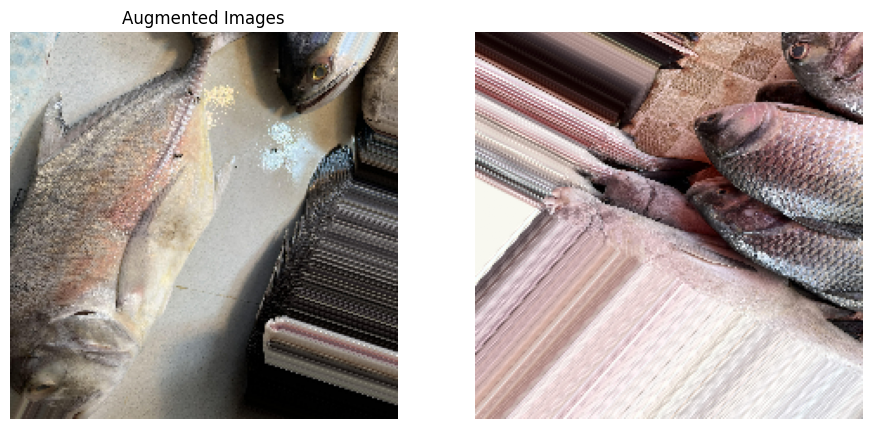

In [27]:
#show random augmented images
import re
dir_path = '/content/drive/MyDrive/Halal Fish Dataset Full/'
plt.figure(figsize=(17, 10))
for i in range(3):
  c_path = random.choice(os.listdir(dir_path))
  if c_path != 'SPLITTED_DATASET':
    c_path = os.path.join(dir_path, c_path)
    i_path = random.choice(os.listdir(c_path))

    while not re.search('augmented', i_path):
      i_path = random.choice(os.listdir(c_path))

    img  = os.path.join(c_path, i_path)
    img = load_and_prep_image(img, scale=True)
    plt.title(f"Augmented Images")
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.axis(False);

In [ ]:
majority_class_names

['Ringi Cat Fish', 'Paplet Fish', 'Rahu Fish', 'Sarum Fish', 'Naiser Fish']

In [ ]:
downsampling_factor = 0.1

# Loop through each class folder
for class_folder in majority_class_names:
    class_directory = os.path.join(path, class_folder)

    while len(os.listdir(class_directory)) > 125:
      # List original image files
      original_files = os.listdir(class_directory)

      # Calculate the number of samples to keep
      num_samples_to_keep = int(len(original_files) * downsampling_factor)

      # Randomly select a subset of samples
      selected_samples = random.sample(original_files, num_samples_to_keep)

      for filename in selected_samples:
        file_path = os.path.join(class_directory, filename)
        os.remove(file_path)

In [ ]:
input_folder = '/content/drive/MyDrive/Halal Fish Dataset Full'
splitfolders.ratio(input_folder, output="/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET",
                   seed=42, ratio=(.7, .0, .3),
                   group_prefix=None)

Copying files: 1688 files [03:23,  8.30 files/s]


In [ ]:
test_dir = '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test'
train_dir = '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/train'

In [ ]:
# Setup data inputs
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                shuffle=False)

Found 1172 files belonging to 19 classes.
Found 516 files belonging to 19 classes.


In [ ]:
train_data.class_names

['Big Raho Fish',
 'Black Water Rahu',
 'Cat Fish',
 'Dhari Fish',
 'Dilwar Fish',
 'Heera Fish',
 'Jalabi Paplet Fish',
 'Moi Fish',
 'Naiser Fish',
 'Paplet Fish',
 'Parrot Fish',
 'Rahu Fish',
 'Red Snapper Fish',
 'Ringi Cat Fish',
 'Safi Fish',
 'Sarum Fish',
 'Silver Carp Fish',
 'Tacan Fish',
 'Zandia or Dhandia Fish']

In [ ]:
# Create checkpoint callback to save model for later use
checkpoint_path = "/content/drive/MyDrive/Halal Fishes Dataset Full/"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True) # only keep the best model weights on file (delete the rest)

In [ ]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

In [ ]:
# Setup base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer") # shape of input image
x = data_augmentation(inputs) # augment images (only happens during training)
x = base_model(x, training=False) # put the base model in inference mode so we can use it to extract features without updating the weights
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x) # pool the outputs of the base model
outputs = layers.Dense(len(train_data.class_names), activation="softmax", name="output_layer")(x) # same number of outputs as classes
model = tf.keras.Model(inputs, outputs)

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 19)                24339     
                                                             

In [ ]:
print("Number of batches in test_data:", len(test_data))

for batch in test_data.take(1):
    print("Batch shape:", batch[0].shape)

Number of batches in test_data: 17
Batch shape: (32, 224, 224, 3)


In [ ]:
batch_size = next(iter(test_data.take(1)))[0].shape[0]
print("Inferred Batch Size:", batch_size)

Inferred Batch Size: 32


In [ ]:
round(0.15 * len(test_data))

3

In [ ]:
validation_steps = tf.cast(0.15 * len(test_data), dtype=tf.int64)
validation_steps

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_all_classes = model.fit(
    train_data,
    epochs=5
)

Epoch 1/5
37/37 [==============================] - 193s 4s/step - loss: 1.9430 - accuracy: 0.5358
Epoch 2/5
37/37 [==============================] - 60s 1s/step - loss: 0.7803 - accuracy: 0.9096
Epoch 3/5
37/37 [==============================] - 59s 1s/step - loss: 0.4432 - accuracy: 0.9497
Epoch 4/5
37/37 [==============================] - 55s 1s/step - loss: 0.3275 - accuracy: 0.9539
Epoch 5/5
37/37 [==============================] - 60s 1s/step - loss: 0.2460 - accuracy: 0.9676


In [ ]:
# Evaluate model
results_feature_extraction_model = model.evaluate(test_data)
results_feature_extraction_model

17/17 [==============================] - 89s 5s/step - loss: 0.4065 - accuracy: 0.9070


[0.40651771426200867, 0.9069767594337463]

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

In [ ]:
# Recompile model with lower learning rate
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
# What layers in the model are trainable?
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetb0 True
global_average_pooling True
output_layer True


In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_all_classes_fine_tune = model.fit(train_data,
                                                     epochs=fine_tune_epochs,
                                                     initial_epoch=history_all_classes.epoch[-1]) # start from previous last epoch

Epoch 5/10
37/37 [==============================] - 66s 1s/step - loss: 0.1681 - accuracy: 0.9667
Epoch 6/10
37/37 [==============================] - 58s 1s/step - loss: 0.1081 - accuracy: 0.9753
Epoch 7/10
37/37 [==============================] - 61s 1s/step - loss: 0.0789 - accuracy: 0.9804
Epoch 8/10
37/37 [==============================] - 55s 1s/step - loss: 0.0797 - accuracy: 0.9744
Epoch 9/10
37/37 [==============================] - 54s 1s/step - loss: 0.0550 - accuracy: 0.9829
Epoch 10/10
37/37 [==============================] - 57s 1s/step - loss: 0.0517 - accuracy: 0.9863


In [ ]:
# Evaluate fine-tuned model on the whole test dataset
results_all_classes_fine_tune = model.evaluate(test_data)
results_all_classes_fine_tune

17/17 [==============================] - 21s 1s/step - loss: 0.2347 - accuracy: 0.9244


[0.23473739624023438, 0.9244186282157898]

In [ ]:
# Check to see if loaded model is a trained model
loaded_loss, loaded_accuracy = model.evaluate(test_data)
loaded_loss, loaded_accuracy

17/17 [==============================] - 20s 1s/step - loss: 0.2347 - accuracy: 0.9244


(0.23473739624023438, 0.9244186282157898)

In [ ]:
# Make predictions with model
pred_probs = model.predict(test_data, verbose=1) # set verbosity to see how long it will take

17/17 [==============================] - 23s 1s/step


In [ ]:
# How many predictions are there?
len(pred_probs)

516

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(516, 19)

In [ ]:
# How do they look?
pred_probs[:10]

array([[7.04570651e-01, 6.53438363e-03, 2.20188927e-02, 4.95716231e-03,
        3.08568560e-05, 3.26929730e-04, 3.85916559e-03, 2.69763614e-03,
        7.83057825e-04, 1.21014588e-01, 1.97516172e-04, 9.46543529e-04,
        5.23480296e-04, 7.34730915e-04, 1.23063242e-02, 7.66348676e-04,
        9.33285919e-05, 1.16959147e-01, 6.79218618e-04],
       [8.02025914e-01, 2.07772609e-05, 2.69616488e-04, 4.43980498e-05,
        1.92752736e-07, 8.97299060e-07, 1.22352896e-04, 4.15068534e-05,
        4.25402777e-06, 1.96513221e-01, 2.16119147e-07, 4.63964534e-05,
        4.74247463e-05, 3.60490230e-04, 7.71004670e-06, 7.40473333e-05,
        8.65371589e-07, 2.12563231e-04, 2.07223173e-04],
       [6.56328678e-01, 6.81368183e-05, 5.33661386e-03, 5.47766569e-04,
        7.13488771e-06, 1.54653480e-05, 2.49031466e-04, 4.04246326e-04,
        2.19271133e-05, 3.32555354e-01, 1.44908006e-06, 2.48624361e-04,
        9.29866292e-05, 2.77818553e-03, 5.66957315e-05, 5.86473849e-04,
        1.08703207e-05

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 19
What prediction probability sample 0 looks like:
 [7.0457065e-01 6.5343836e-03 2.2018893e-02 4.9571623e-03 3.0856856e-05
 3.2692973e-04 3.8591656e-03 2.6976361e-03 7.8305783e-04 1.2101459e-01
 1.9751617e-04 9.4654353e-04 5.2348030e-04 7.3473091e-04 1.2306324e-02
 7.6634868e-04 9.3328592e-05 1.1695915e-01 6.7921862e-04]
The class with the highest predicted probability by the model for sample 0: 0


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch(): # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax()) # append the index which has the largest value (labels are one-hot)
y_labels[:10] # check what they look like (unshuffled)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# How many labels are there? (should be the same as how many prediction probabilities we have)
len(y_labels)

516

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.9244186046511628

In [ ]:
# Does the evaluate method compare to the Scikit-Learn measured accuracy?
print(f"Close? {np.isclose(loaded_accuracy, sklearn_accuracy)} | Difference: {loaded_accuracy - sklearn_accuracy}")

Close? True | Difference: 2.3564627027461427e-08


In [ ]:
# We'll import our make_confusion_matrix function from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/helper_functions.py
from helper_functions import make_confusion_matrix

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Get the class names
class_names = test_data.class_names
class_names[:10]

['Big Raho Fish',
 'Black Water Rahu',
 'Cat Fish',
 'Dhari Fish',
 'Dilwar Fish',
 'Heera Fish',
 'Jalabi Paplet Fish',
 'Moi Fish',
 'Naiser Fish',
 'Paplet Fish']

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 101 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       0.72      1.00      0.84        23
           3       0.77      1.00      0.87        23
           4       1.00      0.77      0.87        30
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       0.85      1.00      0.92        23
           8       1.00      0.92      0.96        37
           9       0.97      0.89      0.93        36
          10       1.00      1.00      1.00        23
          11       0.94      0.83      0.88        36
          12       0.86      0.86      0.86        22
          13       1.00      0.95      0.97        38
          14       0.91      1.00      0.95        30
          15       0.79      0.81      0.80        37
          16       1.00      0.70      0.82        23
          17       0.96    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '2': {'precision': 0.71875,
  'recall': 1.0,
  'f1-score': 0.8363636363636363,
  'support': 23},
 '3': {'precision': 0.7666666666666667,
  'recall': 1.0,
  'f1-score': 0.8679245283018869,
  'support': 23},
 '4': {'precision': 1.0,
  'recall': 0.7666666666666667,
  'f1-score': 0.8679245283018869,
  'support': 30},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '7': {'precision': 0.8518518518518519,
  'recall': 1.0,
  'f1-score': 0.92,
  'support': 23},
 '8': {'precision': 1.0,
  'recall': 0.918918918918919,
  'f1-score': 0.9577464788732395,
  'support': 37},
 '9': {'precision': 0.9696969696969697,
  'recall': 0.8888888888888888,
  'f1-score': 0.927536231884058,
  'support': 36},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Big Raho Fish': 1.0,
 'Black Water Rahu': 1.0,
 'Cat Fish': 0.8363636363636363,
 'Dhari Fish': 0.8679245283018869,
 'Dilwar Fish': 0.8679245283018869,
 'Heera Fish': 1.0,
 'Jalabi Paplet Fish': 1.0,
 'Moi Fish': 0.92,
 'Naiser Fish': 0.9577464788732395,
 'Paplet Fish': 0.927536231884058,
 'Parrot Fish': 1.0,
 'Rahu Fish': 0.8823529411764706,
 'Red Snapper Fish': 0.8636363636363636,
 'Ringi Cat Fish': 0.972972972972973,
 'Safi Fish': 0.9523809523809523,
 'Sarum Fish': 0.8,
 'Silver Carp Fish': 0.8205128205128205,
 'Tacan Fish': 0.9787234042553191,
 'Zandia or Dhandia Fish': 0.9787234042553191}

In [ ]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
0        Big Raho Fish       1.0
6   Jalabi Paplet Fish       1.0
10         Parrot Fish       1.0
1     Black Water Rahu       1.0
5           Heera Fish       1.0

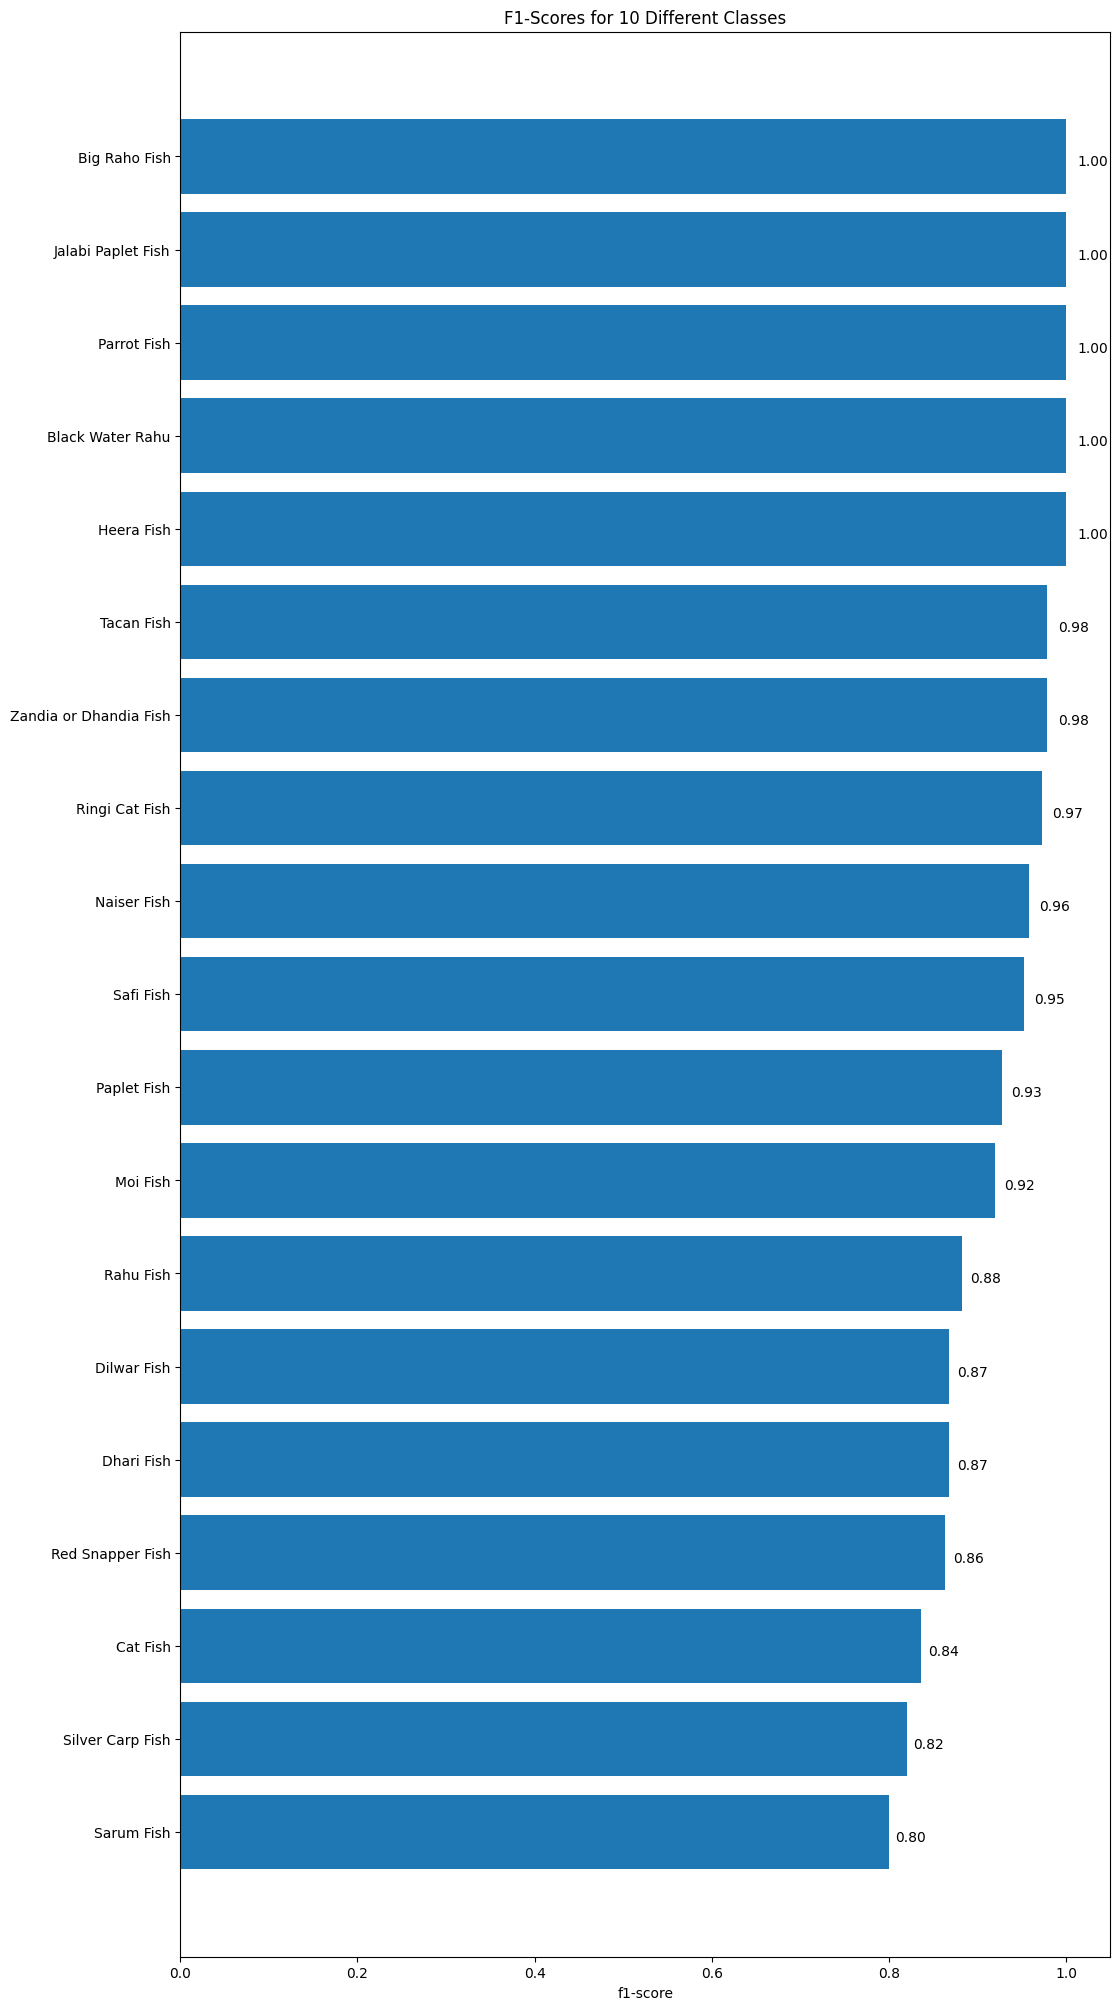

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [6]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).

  Parameters
  ----------
  filename (str): string filename of target image
  img_shape (int): size to resize target image to, default 224
  scale (bool): whether to scale pixel values to range(0, 1), default True
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.io.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    # Rescale the image (get all values between 0 and 1)
    return img/255.
  else:
    return img

1/1 [==============================] - 0s 25ms/step


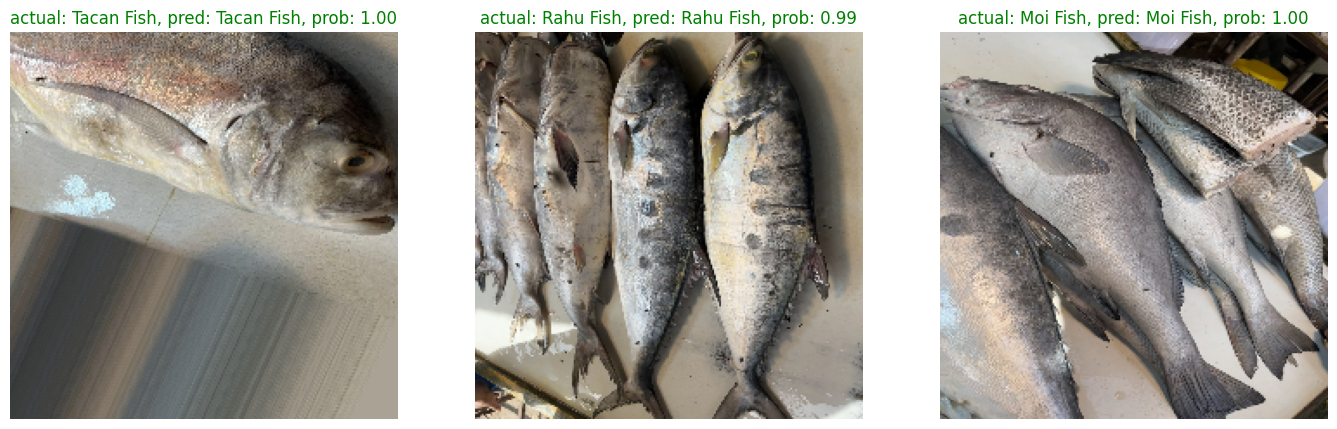

In [ ]:
# Make preds on a series of random images
def make_preds(m):
  plt.figure(figsize=(17, 10))
  for i in range(3):
    # Choose a random image from a random class
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/" + class_name + "/" + filename

    # Load the image and make predictions
    img = load_and_prep_image(filepath, scale=False) # don't scale images for EfficientNet predictions
    pred_prob = m.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
    pred_class = class_names[pred_prob.argmax()] # find the predicted class

    # Plot the image(s)
    plt.subplot(1, 3, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class: # Change the color of text based on whether prediction is right or wrong
      title_color = "g"
    else:
      title_color = "r"
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False);

make_preds(model)

In [ ]:
# 1. Get the filenames of all of our test data
filepaths = []
for filepath in test_data.list_files("/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/*/*", shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1817.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1819.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1820.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1821.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1827.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/Copy of IMG_1828.JPG',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/augmented_160_copy of img_1827.jpg',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/augmented_161_copy of img_1827.jpg',
 b'/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Big Raho Fish/augmented_164_

In [ ]:
len(filepaths)

516

In [ ]:
# 2. Create a dataframe out of current prediction data for analysis
pred_df = pd.DataFrame({"img_path": filepaths,
                        "y_true": y_labels,
                        "y_pred": pred_classes,
                        "pred_conf": pred_probs.max(axis=1), # get the maximum prediction probability value
                        "y_true_classname": [class_names[i] for i in y_labels],
                        "y_pred_classname": [class_names[i] for i in pred_classes]})
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
1  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
2  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
3  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
4  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   

   pred_conf y_true_classname y_pred_classname  
0   0.704571    Big Raho Fish    Big Raho Fish  
1   0.802026    Big Raho Fish    Big Raho Fish  
2   0.656329    Big Raho Fish    Big Raho Fish  
3   0.899237    Big Raho Fish    Big Raho Fish  
4   0.822177    Big Raho Fish    Big Raho Fish

In [ ]:
# 3. Is the prediction correct?
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

img_path  y_true  y_pred  \
0  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
1  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
2  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
3  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   
4  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       0       0   

   pred_conf y_true_classname y_pred_classname  pred_correct  
0   0.704571    Big Raho Fish    Big Raho Fish          True  
1   0.802026    Big Raho Fish    Big Raho Fish          True  
2   0.656329    Big Raho Fish    Big Raho Fish          True  
3   0.899237    Big Raho Fish    Big Raho Fish          True  
4   0.822177    Big Raho Fish    Big Raho Fish          True

In [ ]:
# 4. Get the top wrong examples
top_100_wrong = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_100_wrong.head(20)

img_path  y_true  y_pred  \
314  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      11      12   
315  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      11       2   
460  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
119  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       4       3   
118  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       4       3   
459  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
461  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
424  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      15       7   
223  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       8      14   
456  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
458  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
117  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       4       3   
457  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
224  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       8      14   
428  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      15       9   
227  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       9       2   
455  b'/content/drive/MyDrive/Halal Fish Dataset Fu...      16      15   
188  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       8      11   
226  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       9       2   
116  b'/content/drive/MyDrive/Halal Fish Dataset Fu...       4       3   

     pred_conf  y_true_classname  y_pred_classname  pred_correct  
314   0.981863         Rahu Fish  Red Snapper Fish         False  
315   0.975073         Rahu Fish          Cat Fish         False  
460   0.952222  Silver Carp Fish        Sarum Fish         False  
119   0.949199       Dilwar Fish        Dhari Fish         False  
118   0.943069       Dilwar Fish        Dhari Fish         False  
459   0.930755  Silver Carp Fish        Sarum Fish         False  
461   0.924445  Silver Carp Fish        Sarum Fish         False  
424   0.907119        Sarum Fish          Moi Fish         False  
223   0.899323       Naiser Fish         Safi Fish         False  
456   0.893101  Silver Carp Fish        Sarum Fish         False  
458   0.879760  Silver Carp Fish        Sarum Fish         False  
117   0.875723       Dilwar Fish        Dhari Fish         False  
457   0.872943  Silver Carp Fish        Sarum Fish         False  
224   0.867512       Naiser Fish         Safi Fish         False  
428   0.844688        Sarum Fish       Paplet Fish         False  
227   0.829786       Paplet Fish          Cat Fish         False  
455   0.814516  Silver Carp Fish        Sarum Fish         False  
188   0.811048       Naiser Fish         Rahu Fish         False  
226   0.792400       Paplet Fish          Cat Fish         False  
116   0.772318       Dilwar Fish        Dhari Fish         False

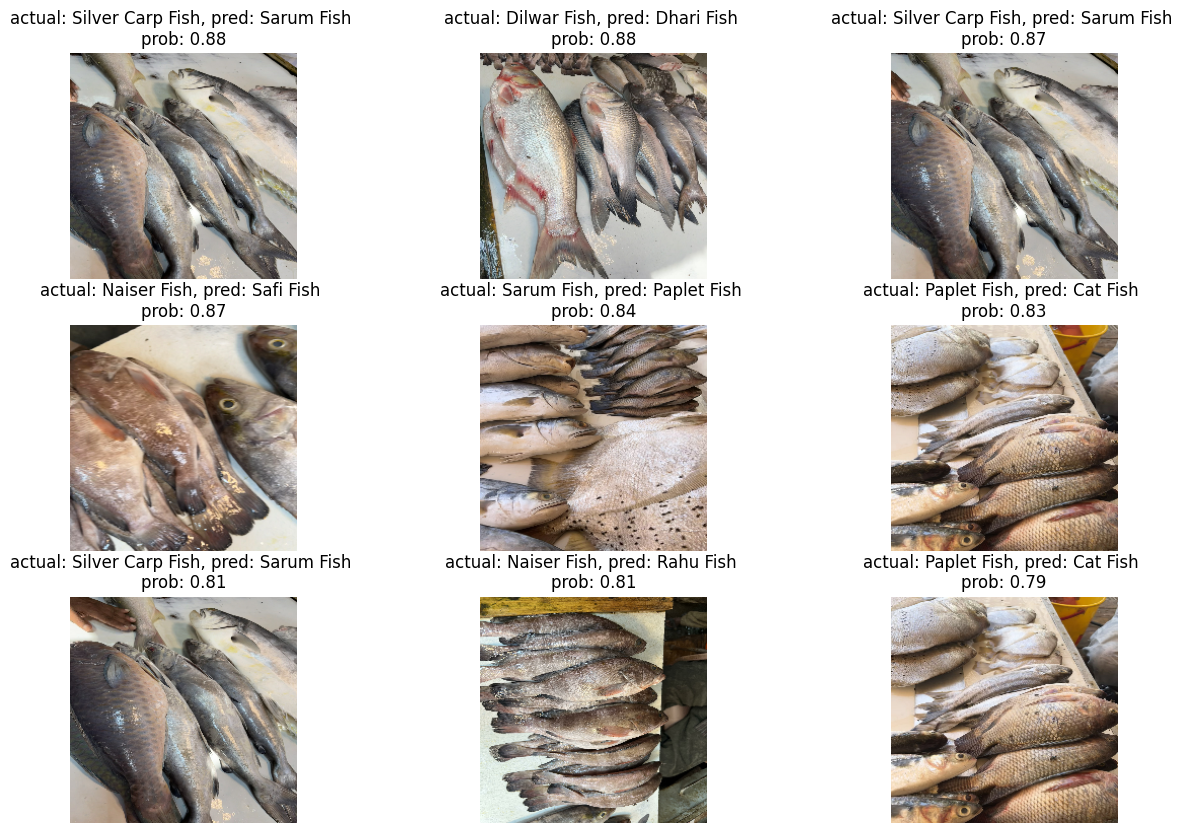

In [ ]:
# 5. Visualize some of the most wrong examples
images_to_view = 9
start_index = 10 # change the start index to view more
plt.figure(figsize=(15, 10))
for i, row in enumerate(top_100_wrong[start_index:start_index+images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row # only interested in a few parameters of each row
  plt.imshow(img)
  plt.title(f"actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}")
  plt.axis(False)

In [ ]:
# Define the directory where your images are located in Google Drive
image_directory = "/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish"

# List all image file paths in the specified directory
custom_food_images = [os.path.join(image_directory, img_path) for img_path in os.listdir(image_directory)]

# Print the list of image file paths
print(custom_food_images)

['/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_643.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_644.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_653.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_652.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_654.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_641.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_651.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_668.jpg', '/content/drive/MyDrive/Halal Fish Dataset Full/SPLITTED_DATASET/test/Silver Carp Fish/IMG_1800.MOV_672.jpg', '/content

In [ ]:
# Make predictions on custom food images
for img in custom_food_images:
  img = load_and_prep_image(img, scale=False) # load in target image and turn it into tensor
  pred_prob = model.predict(tf.expand_dims(img, axis=0)) # make prediction on image with shape [None, 224, 224, 3]
  pred_class = class_names[pred_prob.argmax()] # find the predicted class label
  # Plot the image with appropriate annotations
  plt.figure()
  plt.imshow(img/255.) # imshow() requires float inputs to be normalized
  plt.title(f"pred: {pred_class}, prob: {pred_prob.max():.2f}")
  plt.axis(False)

Output hidden; open in https://colab.research.google.com to view.

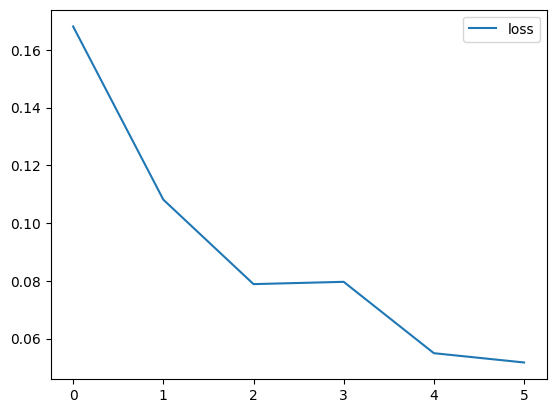

In [ ]:
plt.plot(history_all_classes_fine_tune.history['loss'], label='loss')
#plt.plot(history_all_classes_fine_tune.history['val_loss'], label='val_loss')
plt.legend()

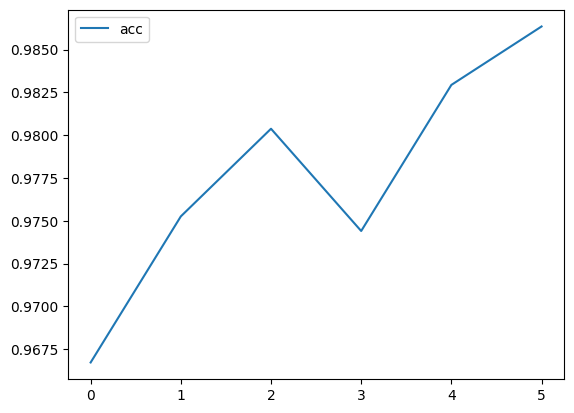

In [ ]:
plt.plot(history_all_classes_fine_tune.history['accuracy'], label='acc')
#plt.plot(history_all_classes_fine_tune.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
model_name = 'fyp_halal_model_fine_tuned2.h5'
model.save(model_name, save_format='h5')
model.save_weights('fyp_halal_model_fine_tuned_weights2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = load_model("fyp_halal_model_fine_tuned2.h5")

In [ ]:
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 output_layer (Dense)        (None, 19)                24339     
                                                             

1/1 [==============================] - 0s 25ms/step


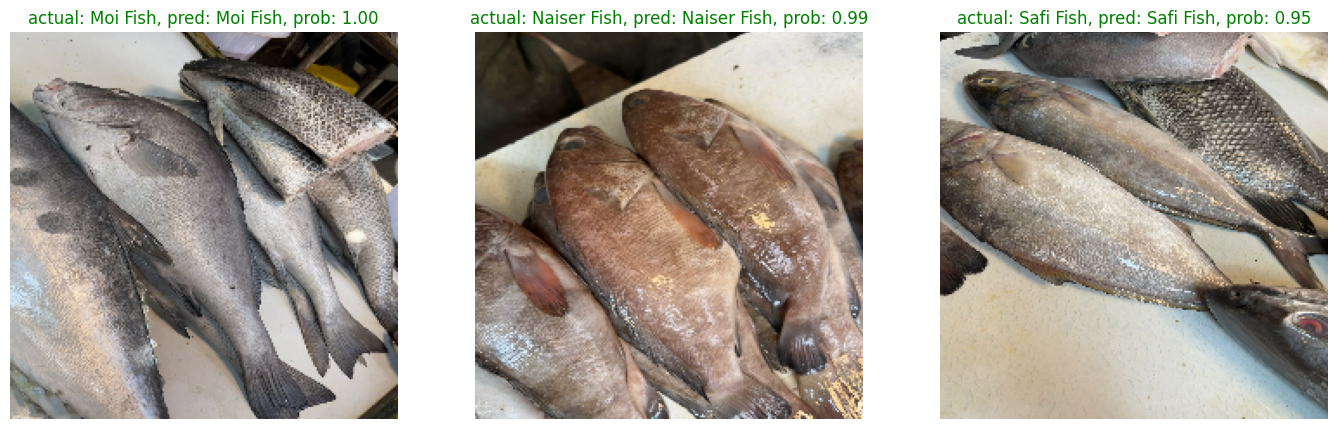

In [ ]:
make_preds(loaded_model)

In [ ]:
# Make predictions with model
pred_probs = loaded_model.predict(test_data, verbose=1) # set verbosity to see how long it will take

17/17 [==============================] - 21s 1s/step


In [ ]:
# How many predictions are there?
len(pred_probs)

516

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(516, 19)

In [ ]:
# How do they look?
pred_probs[:10]

array([[7.04570651e-01, 6.53438363e-03, 2.20188927e-02, 4.95716231e-03,
        3.08568560e-05, 3.26929730e-04, 3.85916559e-03, 2.69763614e-03,
        7.83057825e-04, 1.21014588e-01, 1.97516172e-04, 9.46543529e-04,
        5.23480296e-04, 7.34730915e-04, 1.23063242e-02, 7.66348676e-04,
        9.33285919e-05, 1.16959147e-01, 6.79218618e-04],
       [8.02025914e-01, 2.07772609e-05, 2.69616488e-04, 4.43980498e-05,
        1.92752736e-07, 8.97299060e-07, 1.22352896e-04, 4.15068534e-05,
        4.25402777e-06, 1.96513221e-01, 2.16119147e-07, 4.63964534e-05,
        4.74247463e-05, 3.60490230e-04, 7.71004670e-06, 7.40473333e-05,
        8.65371589e-07, 2.12563231e-04, 2.07223173e-04],
       [6.56328678e-01, 6.81368183e-05, 5.33661386e-03, 5.47766569e-04,
        7.13488771e-06, 1.54653480e-05, 2.49031466e-04, 4.04246326e-04,
        2.19271133e-05, 3.32555354e-01, 1.44908006e-06, 2.48624361e-04,
        9.29866292e-05, 2.77818553e-03, 5.66957315e-05, 5.86473849e-04,
        1.08703207e-05

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 19
What prediction probability sample 0 looks like:
 [7.0457065e-01 6.5343836e-03 2.2018893e-02 4.9571623e-03 3.0856856e-05
 3.2692973e-04 3.8591656e-03 2.6976361e-03 7.8305783e-04 1.2101459e-01
 1.9751617e-04 9.4654353e-04 5.2348030e-04 7.3473091e-04 1.2306324e-02
 7.6634868e-04 9.3328592e-05 1.1695915e-01 6.7921862e-04]
The class with the highest predicted probability by the model for sample 0: 0


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       0.72      1.00      0.84        23
           3       0.77      1.00      0.87        23
           4       1.00      0.77      0.87        30
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       0.85      1.00      0.92        23
           8       1.00      0.92      0.96        37
           9       0.97      0.89      0.93        36
          10       1.00      1.00      1.00        23
          11       0.94      0.83      0.88        36
          12       0.86      0.86      0.86        22
          13       1.00      0.95      0.97        38
          14       0.91      1.00      0.95        30
          15       0.79      0.81      0.80        37
          16       1.00      0.70      0.82        23
          17       0.96    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '2': {'precision': 0.71875,
  'recall': 1.0,
  'f1-score': 0.8363636363636363,
  'support': 23},
 '3': {'precision': 0.7666666666666667,
  'recall': 1.0,
  'f1-score': 0.8679245283018869,
  'support': 23},
 '4': {'precision': 1.0,
  'recall': 0.7666666666666667,
  'f1-score': 0.8679245283018869,
  'support': 30},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '7': {'precision': 0.8518518518518519,
  'recall': 1.0,
  'f1-score': 0.92,
  'support': 23},
 '8': {'precision': 1.0,
  'recall': 0.918918918918919,
  'f1-score': 0.9577464788732395,
  'support': 37},
 '9': {'precision': 0.9696969696969697,
  'recall': 0.8888888888888888,
  'f1-score': 0.927536231884058,
  'support': 36},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Big Raho Fish': 1.0,
 'Black Water Rahu': 1.0,
 'Cat Fish': 0.8363636363636363,
 'Dhari Fish': 0.8679245283018869,
 'Dilwar Fish': 0.8679245283018869,
 'Heera Fish': 1.0,
 'Jalabi Paplet Fish': 1.0,
 'Moi Fish': 0.92,
 'Naiser Fish': 0.9577464788732395,
 'Paplet Fish': 0.927536231884058,
 'Parrot Fish': 1.0,
 'Rahu Fish': 0.8823529411764706,
 'Red Snapper Fish': 0.8636363636363636,
 'Ringi Cat Fish': 0.972972972972973,
 'Safi Fish': 0.9523809523809523,
 'Sarum Fish': 0.8,
 'Silver Carp Fish': 0.8205128205128205,
 'Tacan Fish': 0.9787234042553191,
 'Zandia or Dhandia Fish': 0.9787234042553191}

In [ ]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
0        Big Raho Fish       1.0
6   Jalabi Paplet Fish       1.0
10         Parrot Fish       1.0
1     Black Water Rahu       1.0
5           Heera Fish       1.0

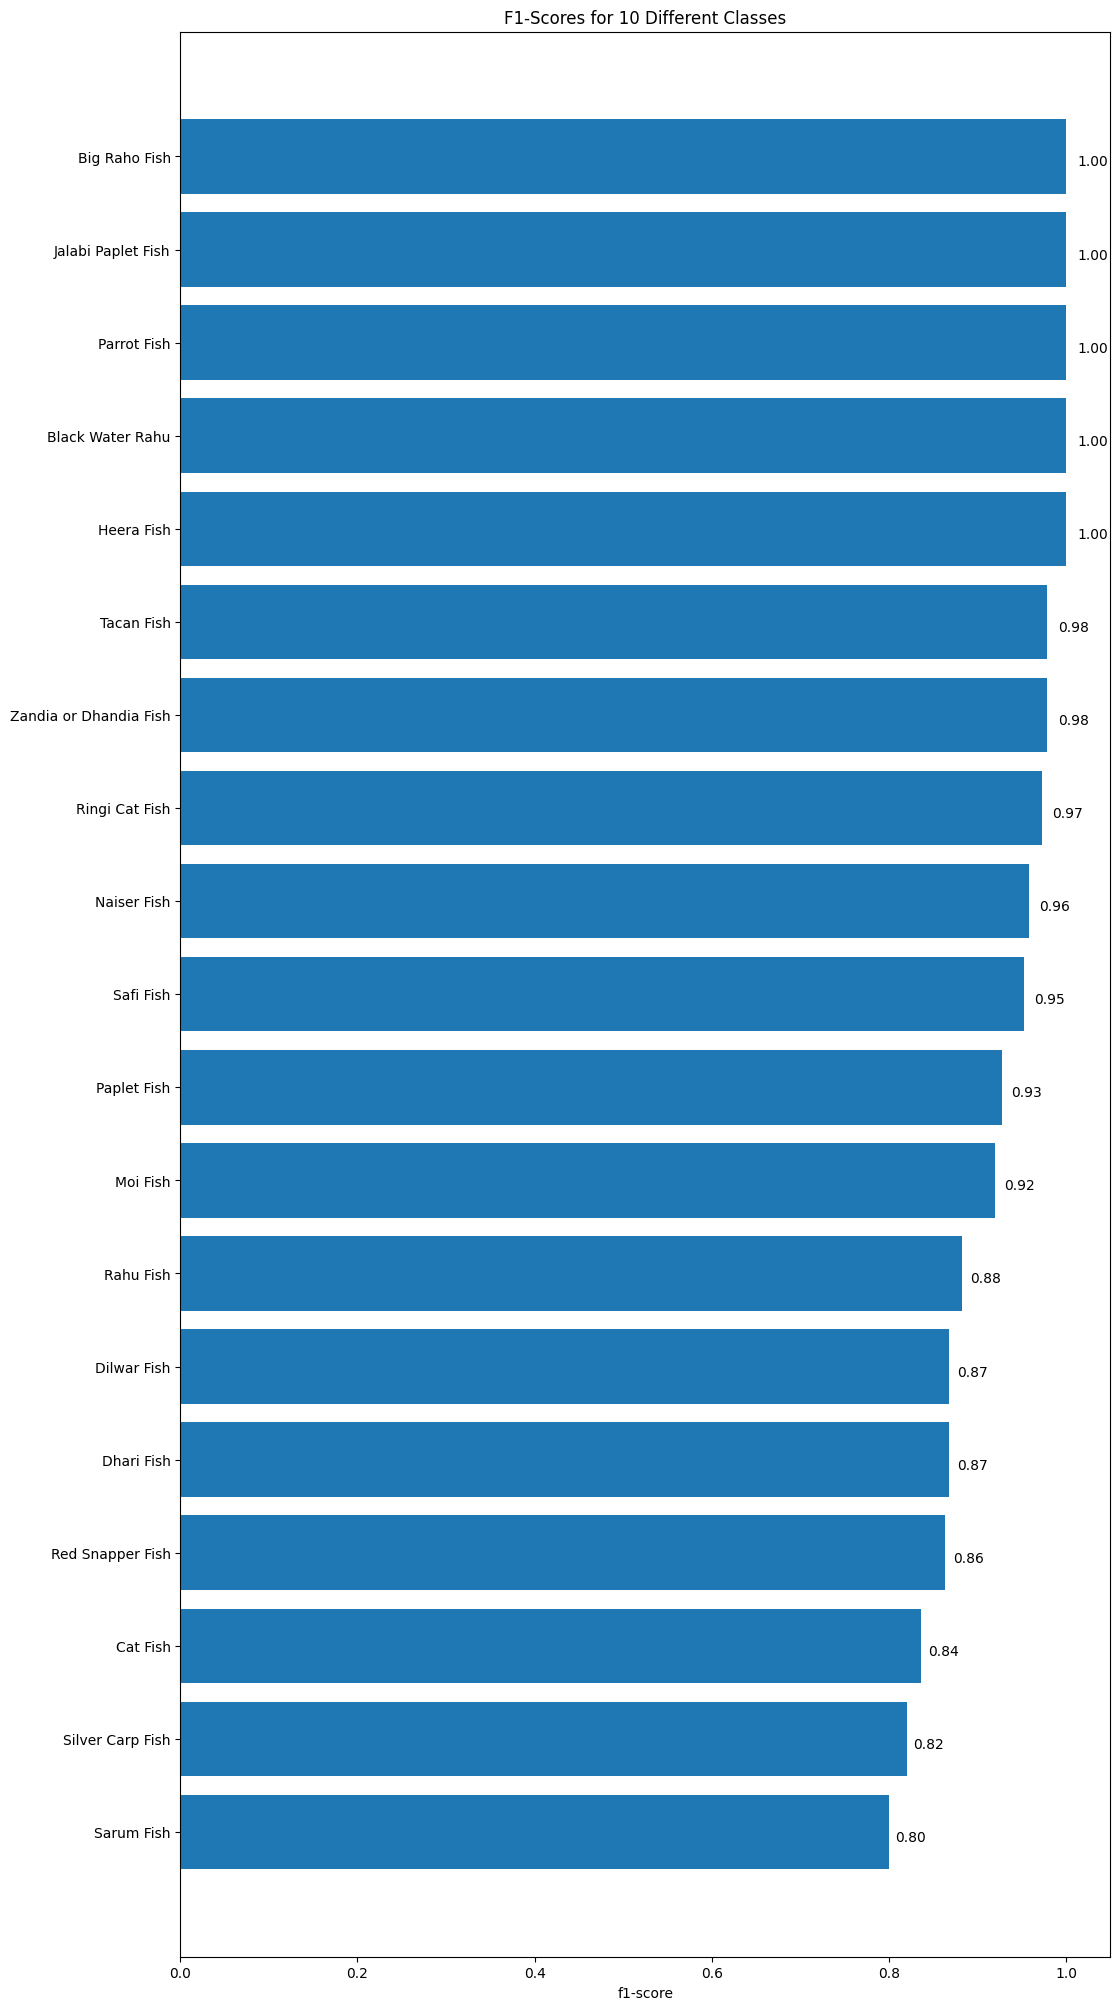

In [ ]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
loaded_model1 = loaded_model
loaded_model1.load_weights("/content/fyp_halal_model_fine_tuned_weights2.h5")

1/1 [==============================] - 0s 29ms/step


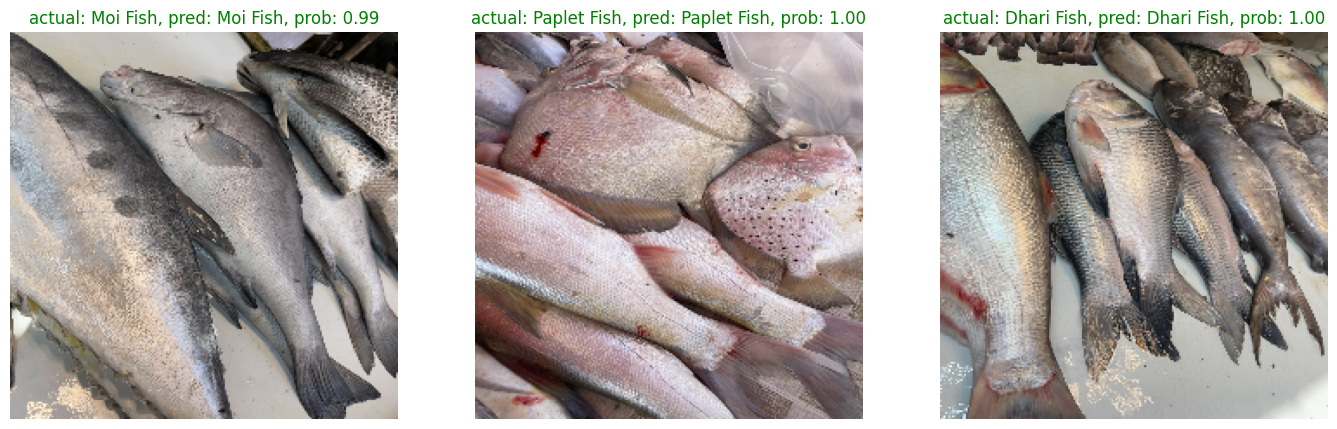

In [ ]:
make_preds(loaded_model1)

In [ ]:
# Make predictions with model
pred_probs = loaded_model1.predict(test_data, verbose=1) # set verbosity to see how long it will take

17/17 [==============================] - 22s 1s/step


In [ ]:
# How many predictions are there?
len(pred_probs)

516

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(516, 19)

In [ ]:
# How do they look?
pred_probs[:10]

array([[7.04570651e-01, 6.53438363e-03, 2.20188927e-02, 4.95716231e-03,
        3.08568560e-05, 3.26929730e-04, 3.85916559e-03, 2.69763614e-03,
        7.83057825e-04, 1.21014588e-01, 1.97516172e-04, 9.46543529e-04,
        5.23480296e-04, 7.34730915e-04, 1.23063242e-02, 7.66348676e-04,
        9.33285919e-05, 1.16959147e-01, 6.79218618e-04],
       [8.02025914e-01, 2.07772609e-05, 2.69616488e-04, 4.43980498e-05,
        1.92752736e-07, 8.97299060e-07, 1.22352896e-04, 4.15068534e-05,
        4.25402777e-06, 1.96513221e-01, 2.16119147e-07, 4.63964534e-05,
        4.74247463e-05, 3.60490230e-04, 7.71004670e-06, 7.40473333e-05,
        8.65371589e-07, 2.12563231e-04, 2.07223173e-04],
       [6.56328678e-01, 6.81368183e-05, 5.33661386e-03, 5.47766569e-04,
        7.13488771e-06, 1.54653480e-05, 2.49031466e-04, 4.04246326e-04,
        2.19271133e-05, 3.32555354e-01, 1.44908006e-06, 2.48624361e-04,
        9.29866292e-05, 2.77818553e-03, 5.66957315e-05, 5.86473849e-04,
        1.08703207e-05

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 19
What prediction probability sample 0 looks like:
 [7.0457065e-01 6.5343836e-03 2.2018893e-02 4.9571623e-03 3.0856856e-05
 3.2692973e-04 3.8591656e-03 2.6976361e-03 7.8305783e-04 1.2101459e-01
 1.9751617e-04 9.4654353e-04 5.2348030e-04 7.3473091e-04 1.2306324e-02
 7.6634868e-04 9.3328592e-05 1.1695915e-01 6.7921862e-04]
The class with the highest predicted probability by the model for sample 0: 0


In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        22
           2       0.72      1.00      0.84        23
           3       0.77      1.00      0.87        23
           4       1.00      0.77      0.87        30
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        22
           7       0.85      1.00      0.92        23
           8       1.00      0.92      0.96        37
           9       0.97      0.89      0.93        36
          10       1.00      1.00      1.00        23
          11       0.94      0.83      0.88        36
          12       0.86      0.86      0.86        22
          13       1.00      0.95      0.97        38
          14       0.91      1.00      0.95        30
          15       0.79      0.81      0.80        37
          16       1.00      0.70      0.82        23
          17       0.96    

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '2': {'precision': 0.71875,
  'recall': 1.0,
  'f1-score': 0.8363636363636363,
  'support': 23},
 '3': {'precision': 0.7666666666666667,
  'recall': 1.0,
  'f1-score': 0.8679245283018869,
  'support': 23},
 '4': {'precision': 1.0,
  'recall': 0.7666666666666667,
  'f1-score': 0.8679245283018869,
  'support': 30},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22},
 '7': {'precision': 0.8518518518518519,
  'recall': 1.0,
  'f1-score': 0.92,
  'support': 23},
 '8': {'precision': 1.0,
  'recall': 0.918918918918919,
  'f1-score': 0.9577464788732395,
  'support': 37},
 '9': {'precision': 0.9696969696969697,
  'recall': 0.8888888888888888,
  'f1-score': 0.927536231884058,
  'support': 36},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'Big Raho Fish': 1.0,
 'Black Water Rahu': 1.0,
 'Cat Fish': 0.8363636363636363,
 'Dhari Fish': 0.8679245283018869,
 'Dilwar Fish': 0.8679245283018869,
 'Heera Fish': 1.0,
 'Jalabi Paplet Fish': 1.0,
 'Moi Fish': 0.92,
 'Naiser Fish': 0.9577464788732395,
 'Paplet Fish': 0.927536231884058,
 'Parrot Fish': 1.0,
 'Rahu Fish': 0.8823529411764706,
 'Red Snapper Fish': 0.8636363636363636,
 'Ringi Cat Fish': 0.972972972972973,
 'Safi Fish': 0.9523809523809523,
 'Sarum Fish': 0.8,
 'Silver Carp Fish': 0.8205128205128205,
 'Tacan Fish': 0.9787234042553191,
 'Zandia or Dhandia Fish': 0.9787234042553191}

In [ ]:
# Turn f1-scores into dataframe for visualization
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
0        Big Raho Fish       1.0
6   Jalabi Paplet Fish       1.0
10         Parrot Fish       1.0
1     Black Water Rahu       1.0
5           Heera Fish       1.0

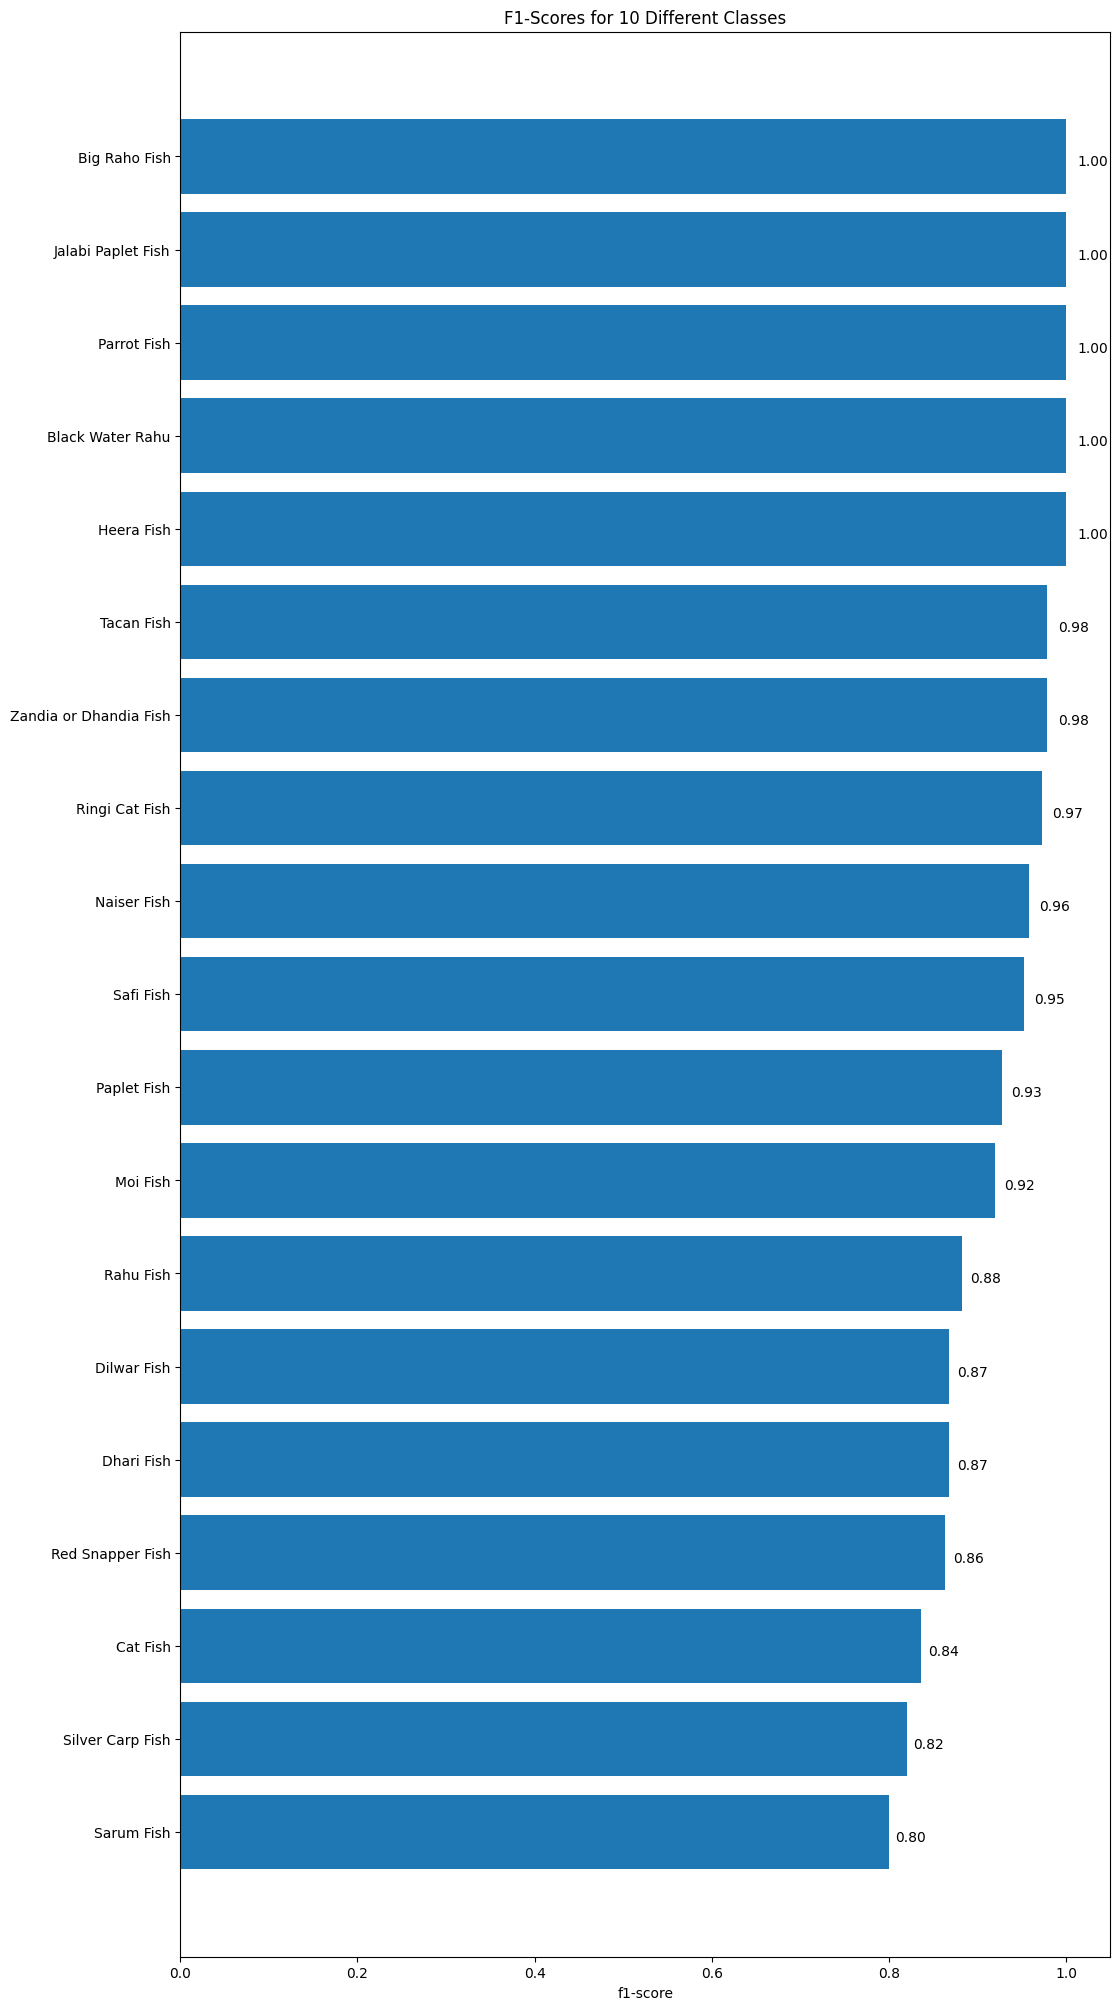

In [ ]:
fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

In [ ]:
#!cp /content/fyp_halal_model_fine_tuned2.h5 '/content/drive/MyDrive/Colab Notebooks/Models'
#!cp /content/fyp_halal_model_fine_tuned_weights2.h5 '/content/drive/MyDrive/Colab Notebooks/Models'